# Gradient Boosting Classifier (GBC)

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Taking the EDA data 
with open('../EDA/EDA.pickle', 'rb') as data:
    df = pickle.load(data)

In [3]:
#Initial values of dataset
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [4]:
#Shape of dataset
df.shape

(2132, 2549)

In [5]:
#Lable mapping
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

In [6]:
#Function for creating train test split
def preprocess_inputs(df):
    df = df.copy()
    
    df['label'] = df['label'].replace(label_mapping)
    
    y = df['label'].copy()
    X = df.drop('label', axis=1).copy()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)
    
    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = preprocess_inputs(df)

In [8]:
print('Shape of Training Dataset:',X_train.shape)
print('Shape of Testing Dataset:',X_test.shape)

Shape of Training Dataset: (1492, 2548)
Shape of Testing Dataset: (640, 2548)


In [9]:
#Creating Pipeline for Random Forrest Classifer Classifier Algorithm
pipeline_gbc = make_pipeline(GradientBoostingClassifier())

In [10]:
%%time
#Fitting the model 
best_model=pipeline_gbc.fit(X_train, y_train)

Wall time: 8min 31s


In [11]:
#Prediction 
gbc_pred = best_model.predict(X_test)

In [12]:
# Training accuracy
print("The training set accuracy is: {} ".format(accuracy_score(y_train, best_model.predict(X_train))))

The training set accuracy is: 1.0 


In [13]:
# Test accuracy
print("The test set accuracy is: {} %".format(accuracy_score(y_test, best_model.predict(X_test))))

The test set accuracy is: 0.984375 %


In [14]:
# Classification report
print("Classification report")
print(classification_report(y_test,gbc_pred))

Classification report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       201
           1       1.00      0.99      0.99       231
           2       0.97      0.99      0.98       208

    accuracy                           0.98       640
   macro avg       0.98      0.98      0.98       640
weighted avg       0.98      0.98      0.98       640



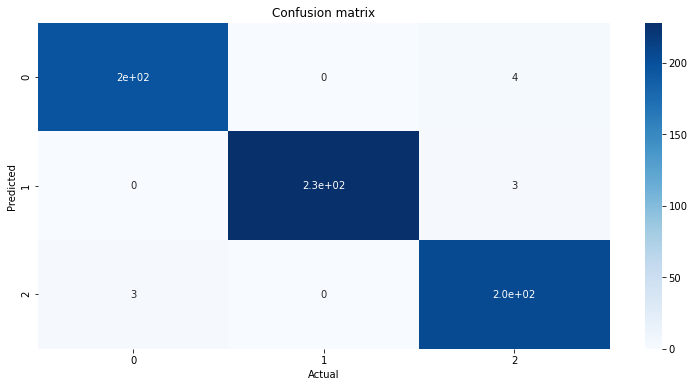

In [15]:
#Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, gbc_pred)
plt.figure(figsize=(12.8,6))
sns.heatmap(conf_matrix, 
            annot=True,
            cmap="Blues")
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Confusion matrix')
plt.savefig("../Images/ConfusionMatrix_GBC.png")

In [16]:
#Creating dictionary for storing the accuracy details
d = {
     'Model': 'Gradient Boosting Classifier',
     'Training Set Accuracy': accuracy_score(y_train, best_model.predict(X_train)),
     'Test Set Accuracy': accuracy_score(y_test, best_model.predict(X_test))
}

#Creating Data Frame 
df_models_gbc = pd.DataFrame(d, index=[0])

In [17]:
df_models_gbc 

,Model,Training Set Accuracy,Test Set Accuracy
0,Gradient Boosting Classifier,1.0,0.984375


In [18]:
#Creating pickle files for further use
with open('../Models/best_gbc.pickle', 'wb') as output:
    pickle.dump(best_model, output)
    
with open('../Models/df_models_gbc.pickle', 'wb') as output:
    pickle.dump(df_models_gbc, output)